<a href="https://colab.research.google.com/github/ASTRONOE/Common_Data_Analysis/blob/KreativStorm/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis Hands-On Program - KreativStorm**
##WEEK 1 ASSIGNMENT

In [ ]:
#ensure pyreadstat for spss is installed!!
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.9 MB/s eta 0:00:00


In [ ]:
#load libraries
import numpy as np
import pandas as pd
import pyreadstat as prs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kstest, norm, shapiro
from google.colab import files

In [ ]:
sav_file = files.upload() #upload file from explorer

Saving Birthweight_reduced_kg_SPSS.sav to Birthweight_reduced_kg_SPSS.sav


In [ ]:
Df, meta = prs.read_sav("Birthweight_reduced_kg_SPSS.sav") #load file

In [ ]:
#print dataframe summary
print(Df.shape)
print(Df.info())

(42, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     float64
 1   Headcirc     42 non-null     float64
 2   Length       42 non-null     float64
 3   Birthweight  42 non-null     float64
 4   Gestation    42 non-null     float64
 5   mage         42 non-null     float64
 6   smoker       42 non-null     float64
 7   mheight      42 non-null     float64
 8   mppwt        42 non-null     float64
 9   fage         42 non-null     float64
 10  fedyrs       42 non-null     float64
 11  fnocig       42 non-null     float64
 12  fheight      42 non-null     float64
 13  lowbwt       42 non-null     float64
 14  mage35       42 non-null     float64
 15  mnocig       42 non-null     float64
dtypes: float64(16)
memory usage: 5.4 KB
None


In [ ]:
Df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,0.0,162.0,57.0,23.0,10.0,35.0,179.0,0.0,0.0,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,0.0,171.0,62.0,19.0,12.0,0.0,183.0,0.0,0.0,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,0.0,172.0,58.0,31.0,16.0,25.0,185.0,0.0,1.0,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,0.0,174.0,68.0,26.0,14.0,25.0,189.0,0.0,0.0,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,0.0,175.0,66.0,30.0,12.0,0.0,184.0,0.0,0.0,0.0


In [ ]:
# Accessing the variable names
print("Variable names:\n", meta.column_names)

# Accessing the variable labels
print("Variable labels:\n", meta.variable_value_labels)

# Accessing the detailed information about each variable
print("Variable information:")
print(meta.column_names_to_labels)

Variable names:
 ['ID', 'Headcirc', 'Length', 'Birthweight', 'Gestation', 'mage', 'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight', 'lowbwt', 'mage35', 'mnocig']
Variable labels:
 {'smoker': {0.0: 'Non-smoker', 1.0: 'Smoker'}, 'lowbwt': {0.0: 'Not low birthweight', 1.0: 'Low birthweight'}, 'mage35': {0.0: 'Aged < 35', 1.0: 'Aged 35+'}}
Variable information:
{'ID': 'Baby ID', 'Headcirc': 'Head circumference (cm)', 'Length': 'Length of baby (cm)', 'Birthweight': 'Birthweight (kg)', 'Gestation': 'Gestational age at birth (weeks)', 'mage': 'Maternal age', 'smoker': None, 'mheight': 'Maternal height (cm)', 'mppwt': "Mother's pre-pregnancy weight (kg)", 'fage': "Father's age", 'fedyrs': 'Years father was in education', 'fnocig': 'Number of cigarettes smoked per day by father', 'fheight': "Father's height (cm)", 'lowbwt': 'Low birthweight baby', 'mage35': 'Mother aged over 35', 'mnocig': 'Number of cigarettes smoked per day by mother'}


`Q1. What is the mean birth weight for babies of non-smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 0.0]['Birthweight'].mean()
print("The mean birth weight for babies of non-smoking mothers is:", round(Answer, 2))

The mean birth weight for babies of non-smoking mothers is: 3.51


`Q2. What is the mean birth weight for babies of smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 1.0]['Birthweight'].mean()
print("The mean birth weight for babies of smoking mothers is:", round(Answer, 2))

The mean birth weight for babies of smoking mothers is: 3.13


`Q3. What is the mean head circumference for babies of non-smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 0.0]['Headcirc'].mean()
print("The mean head circumference for babies of smoking mothers is:", round(Answer, 2))

The mean head circumference for babies of smoking mothers is: 35.05


`Q4. What is the mean gestational age at birth for babies of smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 1.0]['Gestation'].mean()
print("The mean gestational age for babies of smoking mothers is:", round(Answer, 2))

The mean gestational age for babies of smoking mothers is: 38.95


`Q5. What is the maximum head circumference for babies of non-smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 0.0]['Headcirc'].max()
print("The maximum head circumference for babies of non-smoking mothers is:", round(Answer, 2))

The maximum head circumference for babies of smoking mothers is: 39.0


`Q6. What is the minimum gestational age at birth for babies of smoking mothers?`

In [ ]:
Answer = Df[Df['smoker'] == 1.0]['Gestation'].min()
print("The minimum gestational age for babies of smoking mothers is:", round(Answer, 2))

The minimum gestational age for babies of smoking mothers is: 33.0


`Q7. Based on the dataset you have, out of the two, which one would be a better bet:`
* Pregnancy period in smoking mothers is shorter
* Pregnancy period in non-smoking mothers is shorter

`Answer:` Pregnancy period in smoking mothers is "slightly" shorter


`Q8. Justify the above choice in a few words.`

`Answer:` The mean and maximum gestation age period shows that smoking mothers have a shorter gestation period, albeit a period of one week which is a slight difference.

`Q9. What is the baby birth weight range for babies of smoking mothers?`

In [ ]:
Answer1 = Df[Df['smoker'] == 1.0]['Birthweight'].max()
Answer2 = Df[Df['smoker'] == 1.0]['Birthweight'].min()
Answer = Answer1 - Answer2
print("The baby birth weight range for babies of smoking mothers is:", round(Answer, 2))

The baby birth weight range for babies of smoking mothers is: 2.65


`Q10. In your own words describe what the value of the above range for baby's birthweight tells us about smoking versus non-smoking mothers?`

In [ ]:
print(Answer1, Answer2) #from Q9

4.57 1.92


In [ ]:
Answer1 = Df[Df['smoker'] == 0.0]['Birthweight'].max()
Answer2 = Df[Df['smoker'] == 0.0]['Birthweight'].min()
Answer = Answer1 - Answer2 #range
print("The baby birth weight range for babies of smoking non-mothers is:", round(Answer, 2))

The baby birth weight range for babies of smoking non-mothers is: 1.9


In [ ]:
print(Answer1, Answer2) #from Q10

4.55 2.65


`Answer:` There is a significance difference between the birth weights of
 babies from smokers and non-smokers in that while there is very little difference bwtween thei minimum weights of both parties, their maximum weights vary in that smokers tend to have heavier babies.


`Q11. Are head circumference data for babies of smoking mothers normally distributed?`

In [ ]:
Answer = Df[Df['smoker'] == 1.0]['Headcirc'] #mothers who smoke and the head circumference of their babies

Text(0.5, 0, 'Head circumferences')

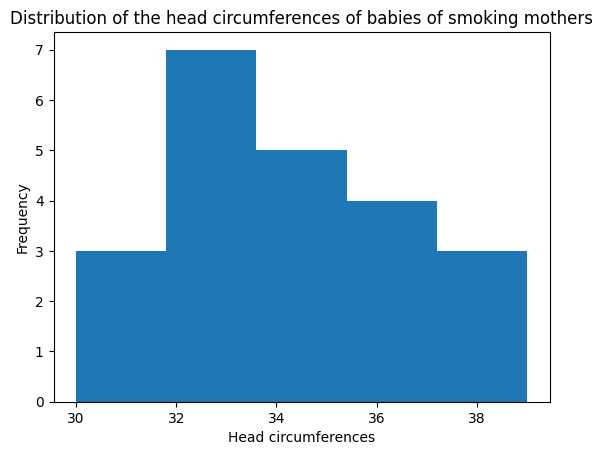

In [ ]:
#Using histogram
Answer.plot.hist(bins=5, title='Distribution of the head circumferences of babies of smoking mothers')
plt.xlabel("Head circumferences")

Text(0.5, 1.0, 'QQ plot to test for normality')

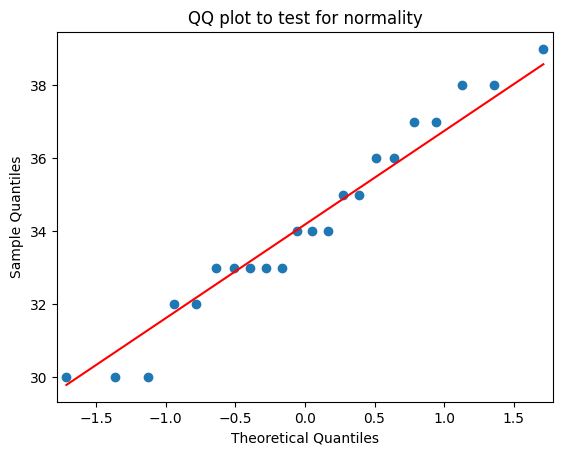

In [ ]:
#Using QQ-plot
sm.qqplot(Answer, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(Answer)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 0.3723871409893036 is greater than the alpha, 0.05
This implies that the data is normally distributed


`Answer:` The QQ-plot and shapiro-wilk test tells us that the data in question is normally distributed. But the histogram disagrees. We vote to agree that the data is normally distributed.

`Q12. What is the significance value for the above on the Shapiro-Wilk test?`

In [ ]:
print("Significance value:", round(p_value, 3))

Significance value: 0.372


`Q13. What is the standard score (Z-score) for head circumference of 35.05 (X=35.05) in non-smoking mothers?`

In [ ]:
mean = Df[Df['smoker'] == 0.0]['Headcirc'].mean()
SD = Df[Df['smoker'] == 0.0]['Headcirc'].std()
z_score = (35.05 - mean)/SD
print("The z-score for head circumference of 35.05 is", z_score)

The z-score for head circumference of 35.05 is 0.0


`Q14. How are birth weight data of non-smoking mothers skewed?`

In [ ]:
Answer = Df[Df['smoker'] == 0.0]['Birthweight'].kurt()
print("The birth weight data of non-smoking mothers is", round(Answer, 3))

The birth weight data of non-smoking mothers is -0.727


`Q15. Are birth weight data for babies of smoking mothers normally distributed?`

In [ ]:
Answer = Df[Df['smoker'] == 1.0]['Birthweight'] #The birth weight of babies of smoking mums

Text(0.5, 0, 'Birth weights')

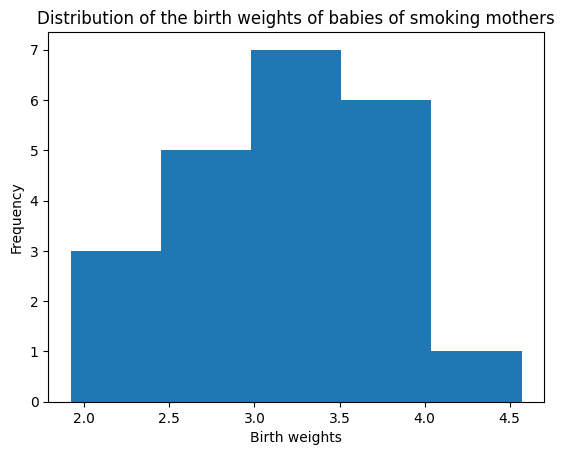

In [ ]:
#Using histogram
Answer.plot.hist(bins=5, title='Distribution of the birth weights of babies of smoking mothers')
plt.xlabel("Birth weights")

Text(0.5, 1.0, 'QQ plot to test for normality')

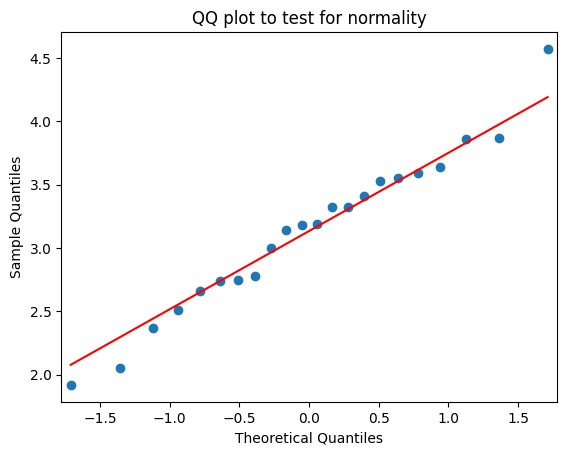

In [ ]:
#Using QQ-plot
sm.qqplot(Answer, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(Answer)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed")

The shapiro p-value, 0.9494693279266357 is greater than the alpha, 0.05
This implies that the data is normally distributed


`Answer:` The QQ-plot and Shapiro-Wilk test tells us that the data is normally distributed. But the histogram plot disagrees. We will go with the QQ-plot and Shapiro-Wilk test results and agree that the data is normally distributed.

`Q16. What is the significance value for the above on the Shapiro-Wilk test?`

In [ ]:
print("Significance value:", p_value)

Significance value: 0.9494693279266357


`Q17. Based on the dataset you have, how confident can you be in saying that a baby's birth weight will be +/- 1 standard deviation from the mean?`

In [ ]:
print("Confidence: 68%")

Confidence: 68%


`Q18. Based on the dataset you have, what is the probability that the birth weight for a baby of a smoking mother will be less than 4.2 kg?`

In [ ]:
smoking_mums_4 = len(Df.loc[(Df['smoker'] == 1) & (Df['Birthweight'] < 4.2), 'Birthweight'])
smoking_mums = len(Df.loc[(Df['smoker'] == 1) & Df['Birthweight'], 'Birthweight'])
Answer = (smoking_mums_4/smoking_mums)*100
print("The probability of a smoking mum giving birth to a baby less than 4,2 is {:.3}%".format(Answer))

The probability of a smoking mum giving birth to a baby less than 4,2 is 95.5%


`Q19. Are data for length of baby of non-smoking mothers normally distributed?`

In [ ]:
#data for length of babies of non-smoking moms
Answer = Df[Df['smoker'] == 0.0]['Length']

Text(0.5, 0, 'Baby lengths')

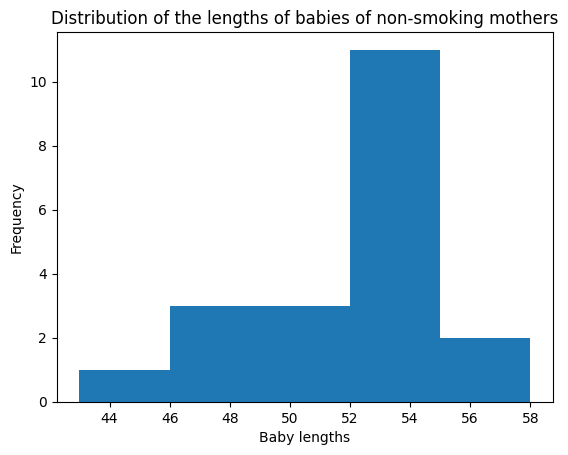

In [ ]:
#Using histogram
Answer.plot.hist(bins=5, title='Distribution of the lengths of babies of non-smoking mothers')
plt.xlabel("Baby lengths")

Text(0.5, 1.0, 'QQ plot to test for normality')

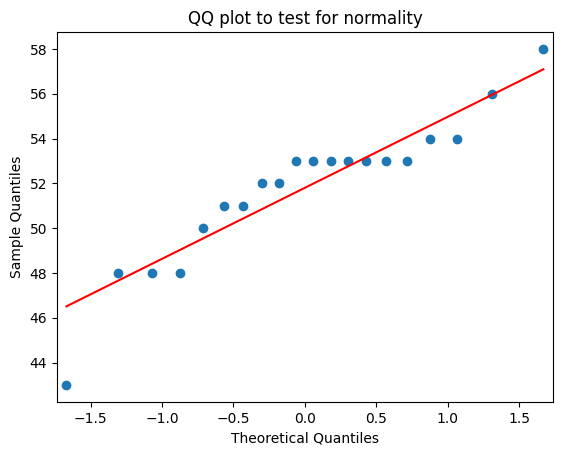

In [ ]:
#Using QQ-plot
sm.qqplot(Answer, line='s')
plt.title("QQ plot to test for normality")

In [ ]:
#Shapiro-Wilk test for normality
shapiro_statistic, p_value = shapiro(Answer)
alpha = 0.05
if p_value > alpha:
  print("The shapiro p-value,", p_value, "is greater than the alpha,", alpha)
  print("This implies that the data is normally distributed")
else:
  print("The shapiro p-value,", p_value, "is less than the alpha,", alpha)
  print("This implies that the data is not normally distributed.")

The shapiro p-value, 0.0703715905547142 is greater than the alpha, 0.05
This implies that the data is normally distributed


`Answer:` The plots from the histogram and QQ plots do not imply a clear normal distribution because of visible skewness. But we will agree with the Shapiro test that it is 'almost' normally distributed.

`Q20. What is the significance value for the above on the Shapiro-Wilk test?`

In [ ]:
print("Significance value", p_value)

Significance value 0.0703715905547142


`Q21. What is the standard score for the length of a baby of 48.5cm for non-smoking mothers?`

In [ ]:
mean = Df[Df['smoker'] == 0.0]['Length'].mean()
SD = Df[Df['smoker'] == 0.0]['Length'].std()

z_score = (48.5 - mean)/SD
print("The standard score for a baby of length 48.5cm for a non-smoking mother is", round(z_score, 3))

The standard score for a baby of length 48.5cm for a non-smoking mother is -1.014


`Q22. Based on the dataset you have, what is the probability that the length of baby for non-smoking mothers will be more than 55 cm?`


In [ ]:
lengths_5 = len(Df.loc[(Df['smoker'] == 0.0) & (Df['Length'] > 55), 'Length'])
lengths = len(Df.loc[(Df['smoker'] == 0.0) & Df['Length'], 'Length'])
Answer = (lengths_5/lengths)*100
print("The probability of a baby of a non-smoking mum to be longer than 55cm is {:.3}%".format(Answer))

The probability of a baby of a non-smoking mum to be longer than 55cm is 10.0%
